# Step #1 Get a List of Cryptos

In [1]:
# Work in progress!
# A tutorial for this file will soon be available at www.relataly.com

# Tested with Python 3.9.13, Matplotlib 3.5.2, Seaborn 0.11.2, numpy 1.21.5, plotly 4.1.1, cryptocompare 0.7.6

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from datetime import date, timedelta, datetime
import seaborn as sns
sns.set_style('white', {'axes.spines.right': False, 'axes.spines.top': False})
import cryptocompare as cc
import requests
import IPython
import yaml
import json
import matplotlib.dates as mdates # Formatting dates
from PIL import Image

# Set the API Key 
yaml_file = open('API Keys/api_config_cryptocompare.yml', 'r')  
p = yaml.load(yaml_file, Loader=yaml.FullLoader)
api_key = p['api_key']
cc.cryptocompare._set_api_key_parameter(api_key)

# Request a list of coins available on cry# ptocompare
coinlist_dict = cc.get_coin_list()
crypto_list_df = pd.DataFrame.from_dict(coinlist_dict, orient='index', dtype=None, columns=None)
crypto_list_df['creation_date'] = pd.to_datetime(crypto_list_df['ContentCreatedOn'], unit='s').dt.date
crypto_list_df['creation_date_yearmonth'] = pd.to_datetime(crypto_list_df['creation_date']).dt.strftime('%Y-%m')
crypto_list_df.drop(columns=['ContentCreatedOn', 'SortOrder', 'Name', 'FullName', 'Url', 'Id', 'Sponsored', 'AssetTokenStatus'], inplace=True)
crypto_list_df

,ImageUrl,Symbol,CoinName,Description,Algorithm,ProofType,Taxonomy,Rating,creation_date,creation_date_yearmonth
BTCD,/media/19630/btcd_1.png,BTCD,BitcoinDark,Bitcoin Dark (BTCD) is a PoW and PoS hybrid al...,SHA-256,PoW/PoS,"{'Access': 'Permissionless', 'FCA': 'Exchange'...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2015-03-30,2015-03
CRAIG,/media/20022/craig.png,CRAIG,CraigsCoin,CraigCoin (CRAIG) is a 100% pure PoS or Proof ...,X11,PoS,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2015-03-30,2015-03
XBS,/media/351060/xbs_1.png,XBS,Bitstake,To create the infrastructure necessary to impl...,X11,PoW/PoS,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2015-04-10,2015-04
XPY,/media/20076/xpy_1.png,XPY,PayCoin,Paycoin is an SHA256 cryptocurrency that switc...,SHA-256,PoS,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2015-04-10,2015-04
PRC,/media/20393/prc.png,PRC,ProsperCoin,ProsperCoin is a PoW cryptocurrency with a mod...,Scrypt,PoW,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2015-02-25,2015-02
...,...,...,...,...,...,...,...,...,...,...
ZZ,/media/43881464/zz.png,ZZ,ZigZag,ZigZag is a decentralized non-custodial order ...,N/A,N/A,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2022-11-16,2022-11
SMETA,/media/43881465/smeta.png,SMETA,StarkMeta,StarkMeta is a game filled with many features....,N/A,N/A,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2022-11-16,2022-11
SYPOOL,/media/43881466/syp.png,SYPOOL,Sypool,Sypool is an asset management protocol on Sola...,N/A,N/A,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2022-11-16,2022-11
AUROS,/media/37746805/awg.png,AUROS,AurusGOLD,Aurus is embracing the concept of DeFi to disr...,N/A,N/A,"{'Access': '', 'FCA': '', 'FINMA': '', 'Indust...","{'Weiss': {'Rating': '', 'TechnologyAdoptionRa...",2021-03-31,2021-03


In [2]:
# Display coins with Weiss Rating
json_struct = json.loads(crypto_list_df[['Rating','Symbol']].to_json(orient="records"))    
df_flat = pd.json_normalize(json_struct)
coins_sorted = df_flat[df_flat['Rating.Weiss.Rating'] != ""].sort_values(by=['Rating.Weiss.Rating', 'Rating.Weiss.TechnologyAdoptionRating', 'Rating.Weiss.MarketPerformanceRating'])
coins_sorted.reset_index().drop(columns=['index'], inplace=True)
coins_sorted.index = np.arange(1, len(coins_sorted) + 1)
coins_sorted.head(15)

,Symbol,Rating.Weiss.Rating,Rating.Weiss.TechnologyAdoptionRating,Rating.Weiss.MarketPerformanceRating
1,MATIC,B,B+,C+
2,LINK,B,B+,D+
3,BTC,B+,A-,D
4,SAND,B-,B,C
5,MANA,B-,B,C-
6,MKR,B-,B,C-
7,SUSHI,B-,B,C-
8,XLM,B-,B,D
9,ETH,B-,B,D
10,LTC,B-,B,D


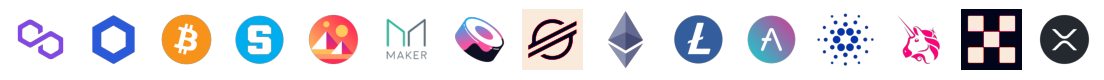

In [3]:
# Print crypto symbol icons
cryptonames = list(coins_sorted['Symbol'].head(15))
cryptonames
fig = plt.figure(figsize=(14, 14))
for i, cryptoname in enumerate(cryptonames):
    coinname_url = 'http://www.cryptocompare.com' + crypto_list_df['ImageUrl'][crypto_list_df['Symbol'] == cryptoname][0]
    im = Image.open(requests.get(coinname_url, stream=True).raw)
    fig.add_subplot(1, len(cryptonames), i+1)
    plt.imshow(im)
    plt.axis('off')

# Step #2 Load Historical Price Data

In [4]:
# Load historic BTC prices
def load_crypto_price(symbol):
    historic_dict = cc.get_historical_price_day_from(symbol)
    df = pd.DataFrame(historic_dict)
    df['date'] = pd.to_datetime(df['time'], unit='s')
    df['date_yearmonth'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
    df.drop(columns=['time', 'conversionType', 'conversionSymbol'])
    df.head()
    return df

historic_btc_price_df = load_crypto_price('BTC')
historic_eth_price_df = load_crypto_price('ETH')
historic_btc_price_df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,date,date_yearmonth
0,1314403200,6.145,6.008,6.008,1.6380,9.873,6.145,direct,,2011-08-27,2011-08
1,1314489600,6.398,6.201,6.145,0.4928,3.098,6.398,direct,,2011-08-28,2011-08
2,1314576000,6.398,6.398,6.398,0.0000,0.000,6.398,direct,,2011-08-29,2011-08
3,1314662400,6.398,6.398,6.398,0.0000,0.000,6.398,direct,,2011-08-30,2011-08
4,1314748800,6.398,6.398,6.398,0.0000,0.000,6.398,direct,,2011-08-31,2011-08


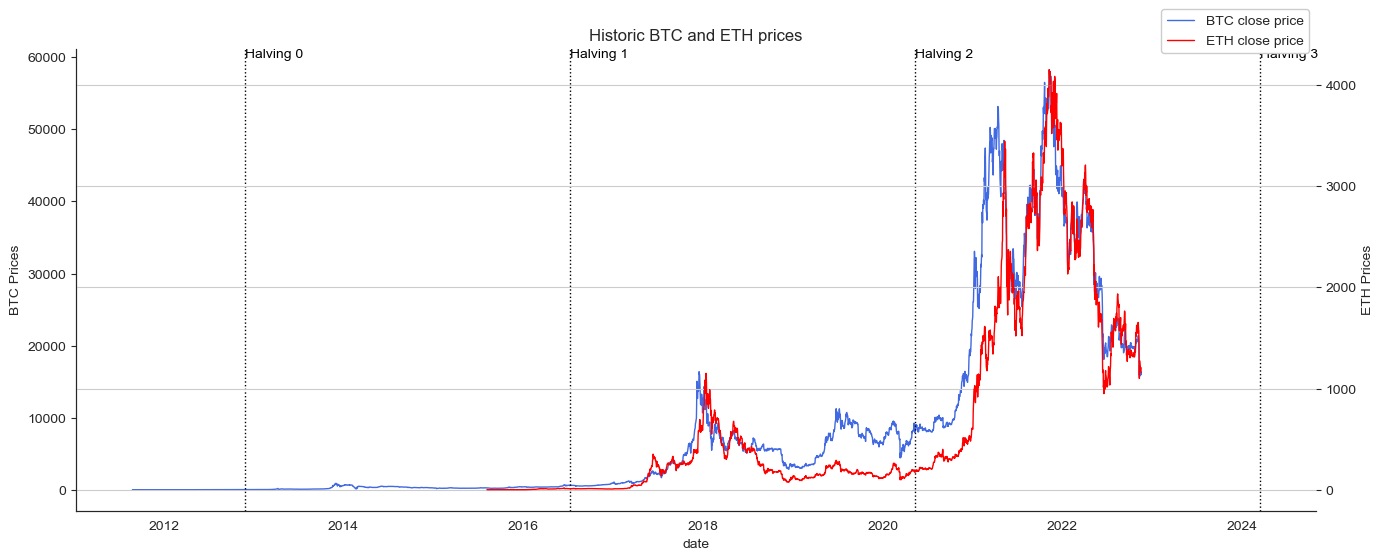

In [5]:
# Creating a Lineplot: Historic BTC and ETH prices

# function that adds bitcoin halving dates asvertical lines
def add_halving_dates(ax):
    # past halvings [2009, 1, 3],[2009, 1, 3], 
    # upcoming halvings [2028, 6, 1]
    halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11', '2024-03-12'] 
    dates_list = [datetime.strptime(date, '%Y-%m-%d').date() for date in halving_dates]
    for i, datex in enumerate(dates_list):
        plt.axvline(x=datex, color = 'black', linewidth=1, linestyle='dotted')
        plt.text(x=datex, y=60000, s='Halving ' + str(i), color = 'black')

# function that creates a nice legend for twinx plots
def add_twinx_legend(ax1, ax2):
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc=1, facecolor='white', framealpha=1, bbox_to_anchor=(1.0, 1.1))
    ax2.get_legend().remove()

fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=historic_btc_price_df, x='date', y='close', color='royalblue', linewidth=1.0, label='BTC close price', ax=ax1)
ax1.set_ylabel('BTC Prices')
add_halving_dates(ax1)
ax2 = ax1.twinx()
sns.lineplot(data=historic_eth_price_df, x='date', y='close', color='red', linewidth=1.0, label='ETH close price', ax=ax2)
ax2.set_ylabel('ETH Prices')

add_twinx_legend(ax1, ax2)
plt.grid()
plt.title('Historic BTC and ETH prices')
plt.show()

# Step #2 Historic BTC Balance Distribution

In [109]:
# Load Historic BTC Balance Distribution Data 
def get_balance_distribution_data(crypto_symbol, data_limit):
  url = f'https://min-api.cryptocompare.com/data/blockchain/balancedistribution/histo/day?fsym={crypto_symbol}&limit={data_limit}'

  headers = {
    'authorization': 'Apikey ' + api_key,
  }

  # API call to the cryptocompare blockchain historic data endpoint
  session = requests.Session()
  session.headers.update(headers)
  response = session.get(url)

  # Conversion of the response to dataframe
  historic_blockdata_dict = json.loads(response.text)
  df = pd.DataFrame.from_dict(historic_blockdata_dict.get('Data').get('Data'), orient='columns', dtype=None, columns=None)
  df['balance_distribution'] = df['balance_distribution'].apply(lambda x: [i for i in x])
  json_struct = json.loads(df[['time','balance_distribution']].to_json(orient="records"))    
  df_flat = pd.json_normalize(json_struct)
  df_flat['date'] = pd.to_datetime(df['time'], unit='s')
  df_flat = pd.concat([df_flat.explode('balance_distribution').drop(['balance_distribution'], axis=1),
           df_flat.explode('balance_distribution')['balance_distribution'].apply(pd.Series)], axis=1)
  df_flat.reset_index(drop=True, inplace=True)
  df_flat['range'] = ['from_' + str(float(df_flat['from'][x])) + '_to_' + str(float(df_flat['to'][x])) for x in range(df_flat.shape[0])]
  df_flat.drop(columns=['from','to', 'time'], inplace=True)
  df_flat
  return df_flat

data_limit = 2000
distribution_btc_df = get_balance_distribution_data('BTC', data_limit)
# slight corrections for BTC distribution
distribution_btc_df = distribution_btc_df[~distribution_btc_df['range'].isin(['from_100000.0_to_0.0'])]
distribution_btc_df['range'].iloc[distribution_btc_df['range'] == 'from_1e-08_to_0.001'] = 'from_0.0_to_0.001'
distribution_btc_df

,date,totalVolume,addressesCount,range
0,2017-05-27,1.954585e+03,9966858.0,from_0.0_to_0.001
1,2017-05-27,1.191426e+04,3124198.0,from_0.001_to_0.01
2,2017-05-27,8.656071e+04,2763916.0,from_0.01_to_0.1
3,2017-05-27,3.992453e+05,1232336.0,from_0.1_to_1.0
4,2017-05-27,1.234762e+06,451133.0,from_1.0_to_10.0
...,...,...,...,...
19994,2022-11-16,1.976803e+06,788653.0,from_1.0_to_10.0
19995,2022-11-16,4.358727e+06,135990.0,from_10.0_to_100.0
19996,2022-11-16,3.879012e+06,13752.0,from_100.0_to_1000.0
19997,2022-11-16,4.637703e+06,1982.0,from_1000.0_to_10000.0


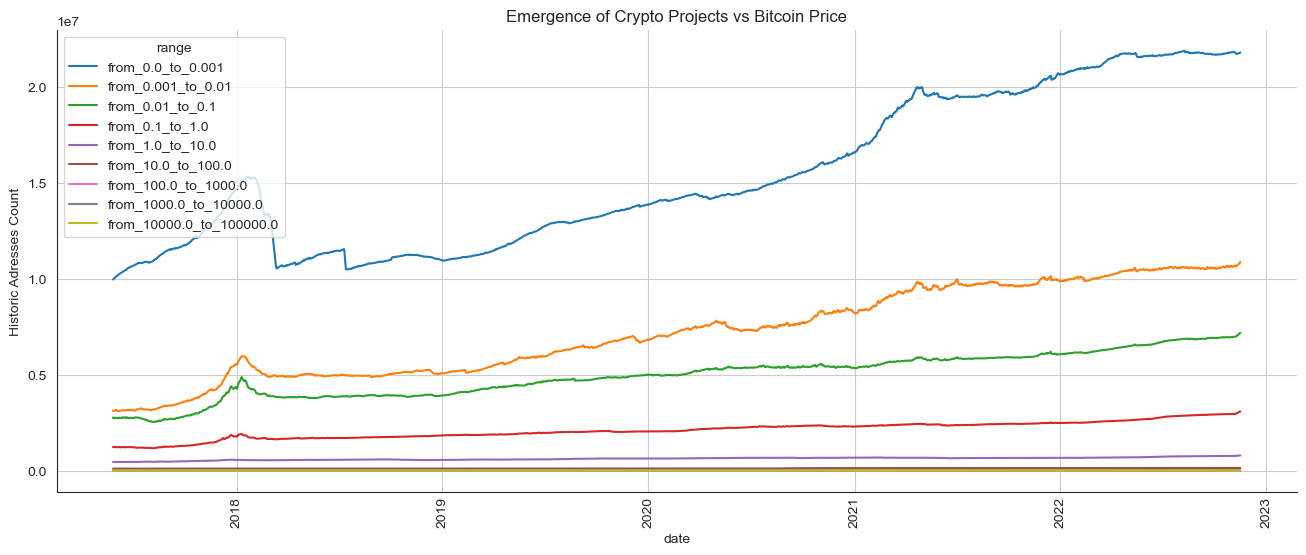

In [105]:
# Creating a Lineplot: Emergence of Crypto Projects vs Bitcoin Price
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=distribution_btc_df, x='date', y='addressesCount', hue='range', ax=ax1)
plt.ylabel('Historic Adresses Count')
plt.grid()
ax1.tick_params(axis="x", rotation=90, labelsize=10, length=0)
plt.title('Historic Distribution of Bitcoin Adresses for Bitcoin by Holding Amount')
plt.show()

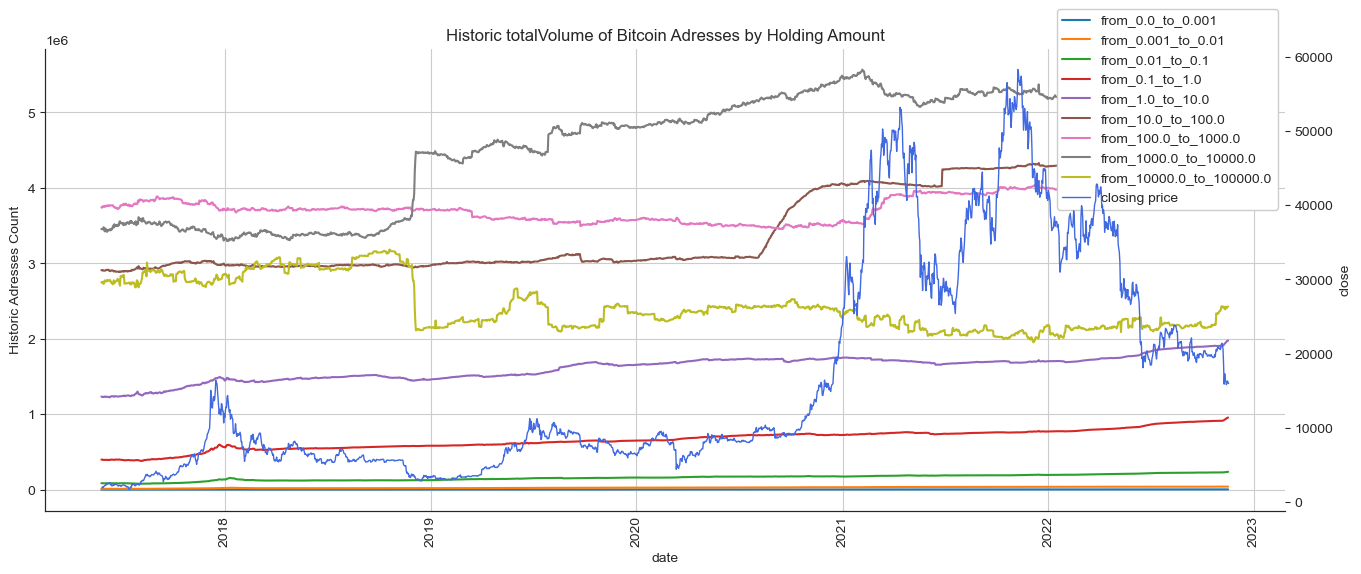

In [111]:
# Creating a Lineplot: Emergence of Crypto Projects vs Bitcoin Price
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=distribution_btc_df, x='date', y='totalVolume', hue='range', ax=ax1)
plt.ylabel('Historic Adresses Count')
plt.grid()
ax1.tick_params(axis="x", rotation=90, labelsize=10, length=0)
ax2 = ax1.twinx()
sns.lineplot(data=historic_btc_price_df[-1 * data_limit:], x='date', y='close', linewidth=1.0, color='royalblue', ax=ax2, label='closing price')
add_twinx_legend(ax1, ax2)
plt.title('Historic totalVolume of Bitcoin Adresses by Holding Amount')
plt.show()

# Step #2 Historic Project Count

In [11]:
# Merge prices data with Bitcoin onchain data
historic_project_count_df = crypto_list_df[['Symbol','creation_date_yearmonth']].groupby(by=['creation_date_yearmonth']).count()
historic_btc_price_monthly_average_df = historic_btc_price_df[['close','date_yearmonth']].groupby(by=['date_yearmonth']).mean()
merge_df = historic_project_count_df.join(historic_btc_price_monthly_average_df)
merge_df.index.names = ['Date']
merge_df

,Symbol,close
Date,,
2014-12,2,278.359032
2015-02,15,206.127500
2015-03,82,249.057419
2015-04,242,217.890333
2015-06,27,211.074000
...,...,...
2022-07,154,21118.475806
2022-08,140,22091.041613
2022-09,29,19976.850333


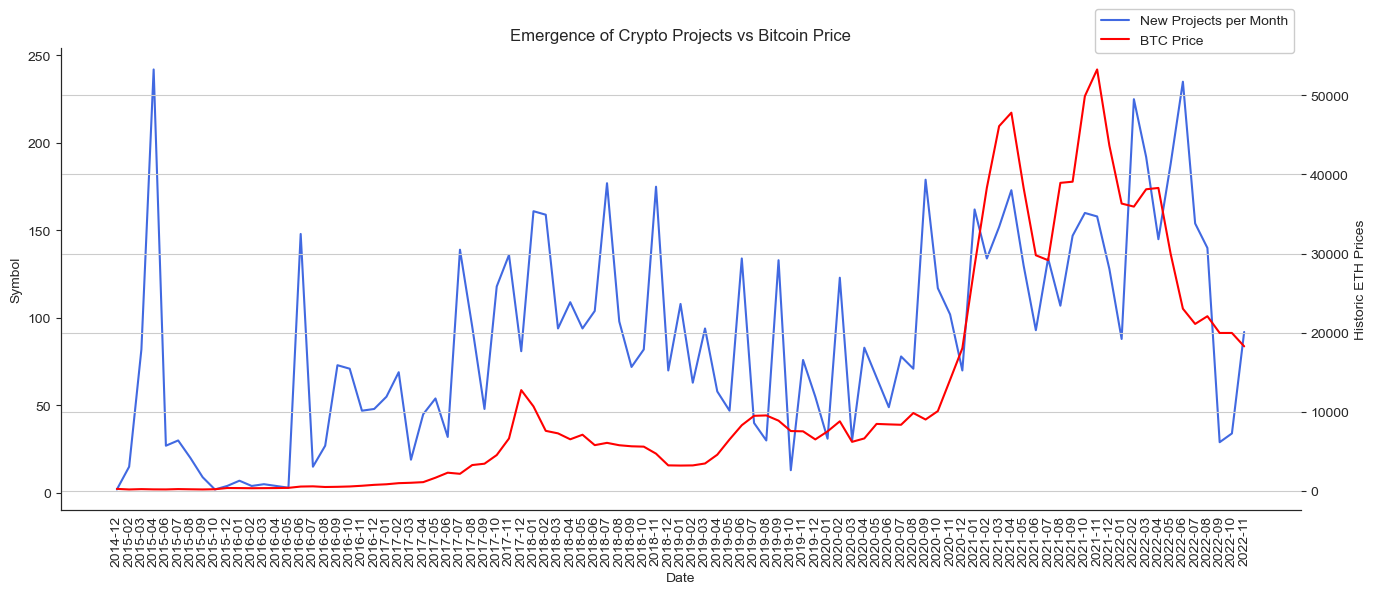

In [12]:
# Creating a Lineplot: Emergence of Crypto Projects vs Bitcoin Price
fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=merge_df, x='Date', y='Symbol', color='royalblue', label='New Projects per Month', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=merge_df, x='Date', y='close', color='red', label='BTC Price',ax=ax2)
plt.ylabel('Historic ETH Prices')
plt.grid()
add_twinx_legend(ax1, ax2)
ax1.tick_params(axis="x", rotation=90, labelsize=10, length=0)
plt.title('Emergence of Crypto Projects vs Bitcoin Price')
plt.show()

# Step #4 Load OnChain Data

In [13]:
# Load Historic OnChain Data for Bitcoin

def get_onchain_data(crypto_symbol, data_limit):
  url = f'https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym={crypto_symbol}&limit={data_limit}'

  headers = {
    'authorization': 'Apikey ' + api_key,
  }

  # API call to the cryptocompare blockchain historic data endpoint
  session = requests.Session()
  session.headers.update(headers)
  response = session.get(url)

  # Conversion of the response to dataframe
  historic_blockdata_dict = json.loads(response.text)
  df = pd.DataFrame.from_dict(historic_blockdata_dict.get('Data').get('Data'), orient='columns', dtype=None, columns=None)
  df['date'] = pd.to_datetime(df['time'], unit='s')
  df.drop(columns='time', inplace=True)
  return df

data_limit = 2000
onchain_btc_df = get_onchain_data('BTC', data_limit)
onchain_eth_df = get_onchain_data('ETH', data_limit)
onchain_btc_df.head()

,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply,date
0,1182,BTC,247448551,265136678,449196,896081,331914,226654772,9375,8.006224,468462,4.976779e+06,5.959219e+11,514.281437,991460,1.635578e+07,2017-05-27
1,1182,BTC,247875830,265534517,397839,860215,308143,226962915,10415,9.043029,468627,4.874719e+06,5.959219e+11,525.048780,977982,1.635784e+07,2017-05-28
2,1182,BTC,248238059,265956989,422472,773589,321638,227284553,9577,7.850842,468778,4.450315e+06,5.959219e+11,575.120000,977900,1.635973e+07,2017-05-29
3,1182,BTC,248646442,266417099,460110,851547,347961,227632514,15138,10.996721,468957,5.289686e+06,5.959219e+11,483.859551,980603,1.636196e+07,2017-05-30
4,1182,BTC,249035527,266854699,437600,822814,321634,227954148,13223,10.354663,469121,4.873008e+06,5.959219e+11,525.233129,976696,1.636401e+07,2017-05-31


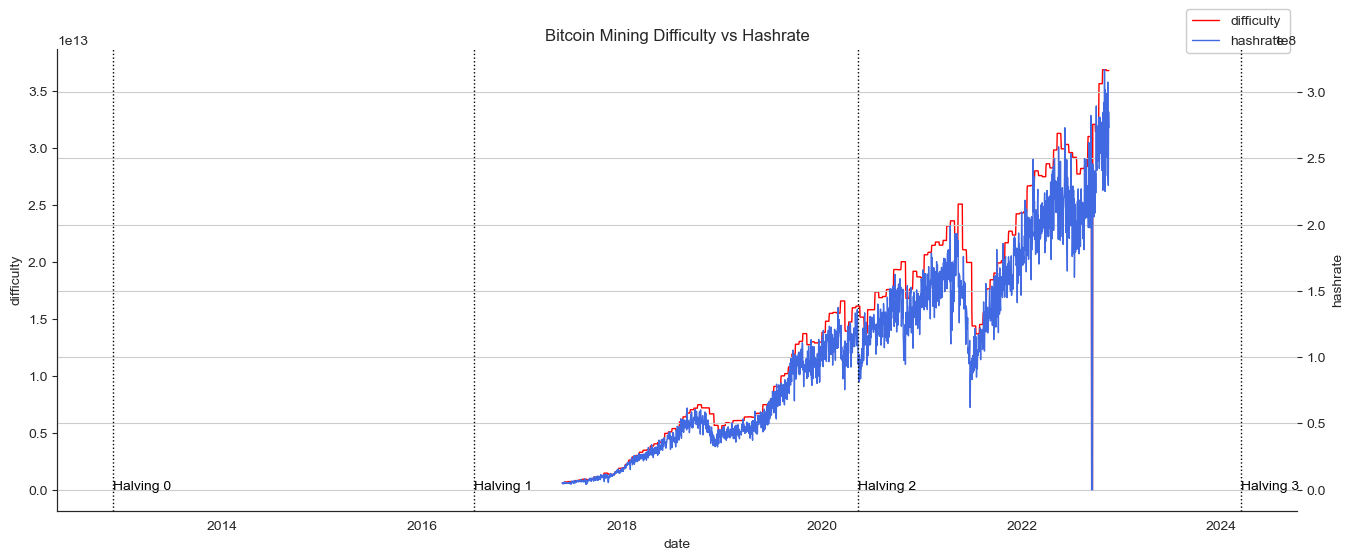

In [14]:
# Creating a Lineplot: Bitcoin  Difficulty vs Hashrate

fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=onchain_btc_df, x='date', y='difficulty', linewidth=1.0, color='red', ax=ax1, label='difficulty')
ax2 = ax1.twinx()
sns.lineplot(data=onchain_btc_df, x='date', y='hashrate', linewidth=1.0, color='royalblue', ax=ax2, label='hashrate')
add_twinx_legend(ax1, ax2)
add_halving_dates(ax1)
plt.grid()
plt.title('Bitcoin Mining Difficulty vs Hashrate')
plt.show()

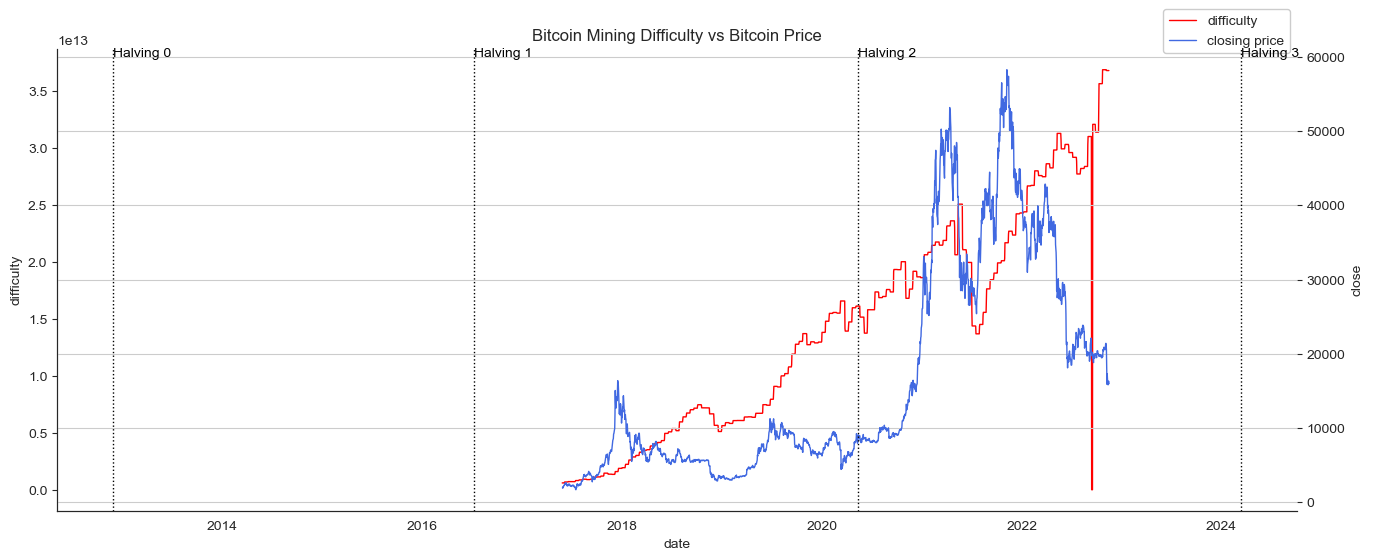

In [15]:
# Creating a Lineplot: Bitcoin Mining Difficulty vs Bitcoin Price

fig, ax1 = plt.subplots(figsize=(16, 6))
sns.lineplot(data=onchain_btc_df, x='date', y='difficulty', linewidth=1.0, color='red', ax=ax1, label='difficulty')
ax2 = ax1.twinx()
sns.lineplot(data=historic_btc_price_df[-1 * data_limit:], x='date', y='close', linewidth=1.0, color='royalblue', ax=ax2, label='closing price')
add_twinx_legend(ax1, ax2)
add_halving_dates(ax1)
plt.grid()
plt.title('Bitcoin Mining Difficulty vs Bitcoin Price')
plt.show()

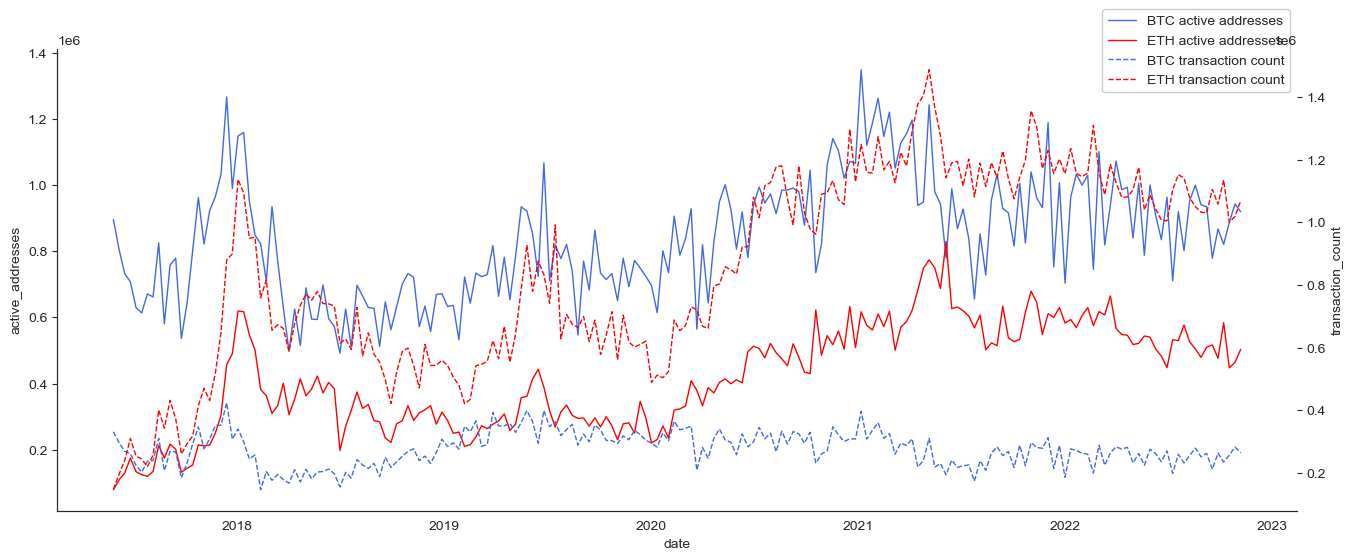

In [16]:
# Creating a Lineplot

fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()
sns.lineplot(data=onchain_btc_df[-1*data_limit::10], x='date', y='active_addresses', linewidth=1.0, color='royalblue', ax=ax1, label='BTC active addresses')
sns.lineplot(data=onchain_btc_df[-1*data_limit::10], x='date', y='transaction_count', linewidth=1.0, color='royalblue', ax=ax2, linestyle='--', label='BTC transaction count')
sns.lineplot(data=onchain_eth_df[-1*data_limit::10], x='date', y='active_addresses', linewidth=1.0, color='red', ax=ax1, label='ETH active addresses')
sns.lineplot(data=onchain_eth_df[-1*data_limit::10], x='date', y='transaction_count', linewidth=1.0, color='red', linestyle='--', ax=ax2, label='ETH transaction count')
add_twinx_legend(ax1, ax2)
plt.show()